<a href="https://colab.research.google.com/github/alejabejarano/alejabejarano/blob/main/Trabajo_Final_Econometr%C3%ADa_Avanzada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Econometría Avanzada Código:
## María Alejandra Bejarano (202324563)
###Modelo de efectos Fijos y PSM:


### Modelo Panel de datos efectos Fijos

In [ ]:

# Instalar e importar librerías:

!pip install linearmodels
import pandas as pd

df = pd.read_csv('/content/Inclusi_n_Financiera_20250528.csv')
df.head()
df.describe()



,TIPO DE ENTIDAD,CODIGO DE LA ENTIDAD,UNIDAD DE CAPTURA,RENGLON,NRO CORRESPONSALES PROPIOS,NRO CORRESPONSALES TERCERIZADOS,NRO CORRESPONSALES ACTIVOS,NRO CORRESPONSALES,NRO DEPOSITOS,MONTO DEPOSITOS,...,NRO MICROCREDITO> 10SMMLV HASTA 25SMMLV,MONTO MICROCREDI> 10SMMLV HASTA 25SMMLV,NRO MICROCREDITO MUJERES,MONTO MICROCREDITO MUJERES,NRO MICROCREDITO HOMBRES,MONTO MICROCREDITO HOMBRES,NRO TOTAL MICROCREDITO,MONTO TOTAL MICROCREDITO,NRO PROD DEPOSITO NIVEL NACIONAL,MONTO PROD DEPOSITO NIVEL NACIONAL
count,603232.000000,603232.000000,603232.000000,603232.000000,603232.000000,603232.000000,603232.000000,603232.00000,6.032320e+05,6.032320e+05,...,603232.000000,6.032320e+05,603232.000000,6.032320e+05,603232.000000,6.032320e+05,603232.000000,6.032320e+05,6.032320e+05,6.032320e+05
mean,8.947049,27.656316,13.085887,450.665280,1.518853,17.177678,8.785545,19.70910,1.617475e+03,7.855458e+08,...,3.543786,4.355318e+07,14.792562,6.589111e+07,11.265735,6.089629e+07,26.327363,1.346937e+08,1.399190e+08,6.934047e+10
std,24.714455,23.028356,8.743754,314.394986,69.992523,369.589068,211.819952,396.09117,1.135320e+05,5.607540e+10,...,129.240603,1.549773e+09,496.795230,1.980196e+09,375.003762,1.851852e+09,867.208013,4.019025e+09,6.619899e+10,4.003662e+12
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000,7.000000,5.000000,175.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000,26.000000,11.000000,425.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000,43.000000,21.000000,693.000000,0.000000,1.000000,1.000000,1.00000,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
max,128.000000,122.000000,41.000000,999.000000,15386.000000,35484.000000,31699.000000,35484.00000,3.400534e+07,1.709990e+13,...,29325.000000,3.674887e+11,78439.000000,2.827087e+11,62082.000000,3.463338e+11,140529.000000,6.952816e+11,4.219320e+13,6.162038e+14


In [ ]:
# Lista de variables con sus tipos
variable_types = df.dtypes.reset_index()
variable_types.columns = ['Variable', 'Tipo de Dato']
display(variable_types)


,Variable,Tipo de Dato
0,TIPO DE ENTIDAD,int64
1,CODIGO DE LA ENTIDAD,int64
2,NOMBRE DE LA ENTIDAD,object
3,FECHA DE CORTE,object
4,UNIDAD DE CAPTURA,int64
...,...,...
82,MONTO MICROCREDITO HOMBRES,float64
83,NRO TOTAL MICROCREDITO,int64
84,MONTO TOTAL MICROCREDITO,float64
85,NRO PROD DEPOSITO NIVEL NACIONAL,float64


In [ ]:
print(df.columns.tolist())

# Lista con los nombres exactos de las columnas que quieres
columnas_originales = [
    'FECHA DE CORTE',
    'DEPARTAMENTO',
    'RENGLON',
    'MUNICIPIO',
    'TIPO DE ENTIDAD',
    'NOMBRE DE LA  ENTIDAD',
    'NRO CORRESPONSALES ACTIVOS',
    'NRO CTA AHORRO MUJERES',
    'NRO CTA AHORRO HOMBRES'
]

# Filtrar el DataFrame para quedarte solo con esas columnas
df = df[columnas_originales]

# Renombrar columnas para facilitar el manejo posterior
df = df.rename(columns={
    'FECHA DE CORTE': 'fechacorte',
    'DEPARTAMENTO': 'departamento',
    'RENGLON': 'renglon',
    'MUNICIPIO': 'municipio',
    'TIPO DE ENTIDAD': 'tipoentidad',
    'NOMBRE DE LA  ENTIDAD': 'nombreentidad',
    'NRO CORRESPONSALES ACTIVOS': 'corresactivos',
    'NRO CTA AHORRO MUJERES': 'generonromca',
    'NRO CTA AHORRO HOMBRES': 'generonrohca'
})

# Verificar resultado
print(df.head())



['TIPO DE ENTIDAD', 'CODIGO DE LA  ENTIDAD', 'NOMBRE DE LA  ENTIDAD', 'FECHA DE CORTE', 'UNIDAD DE CAPTURA', 'DEPARTAMENTO', 'RENGLON', 'MUNICIPIO', 'TIPO', 'NRO CORRESPONSALES PROPIOS', 'NRO CORRESPONSALES TERCERIZADOS', 'NRO CORRESPONSALES ACTIVOS', 'NRO CORRESPONSALES', 'NRO DEPOSITOS', 'MONTO DEPOSITOS', 'NRO GIROS ENVIADOS ', 'MONTO GIROS ENVIADOS ', 'NRO GIROS RECIBIDOS', 'MONTO GIROS RECIBIDOS', 'NRO PAGOS', 'MONTO PAGOS', 'NRO RETIROS', 'MONTO RETIROS', 'NRO TRANSFERENCIAS', 'MONTO TRANSFERENCIAS', 'NRO TOTAL ', 'MONTO TOTAL', 'NRO CTA AHORRO HASTA 1 SMMLV', 'SALDO CTA AHORRO HASTA 1 SMMLV', 'NRO CTA AHORRO > 1 SMMLV HASTA 3 SMMLV', 'SALDO CTA AHORRO> 1 SMMLV HASTA 3 SMMLV', 'NRO CTA AHORRO> 3 SMMLV HASTA 5 SMMLV', 'SALDO CTA AHORRO> 3 SMMLV HASTA 5 SMMLV', 'NRO CTA AHORRO ACTIVAS', 'SALDO CTA AHORRO ACTIVAS', 'NRO CTA AHORRO MUJERES', 'SALDO CTA AHORRO MUJERES', 'NRO CTA AHORRO HOMBRES', 'SALDO CTA AHORRO HOMBRES', 'NRO TOTAL CTA AHORROS', 'SALDO TOTAL CTA AHORROS', 'NRO CTA A

In [ ]:
# Definir nueva variable:

import numpy as np

df['brechait'] = np.where(
    (df['generonromca'] + df['generonrohca']) == 0,
    0,
    (df['generonromca'] - df['generonrohca']) / (df['generonromca'] + df['generonrohca'])
)

df[['generonromca', 'generonrohca', 'brechait']].head()



,generonromca,generonrohca,brechait
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [ ]:
print(df.columns.tolist())



['fechacorte', 'departamento', 'renglon', 'municipio', 'tipoentidad', 'nombreentidad', 'corresactivos', 'generonromca', 'generonrohca', 'brechait']


In [ ]:
# Convertir 'fechacorte' a formato datetime (ajusta el formato según tu data)
df['fechacorte'] = pd.to_datetime(df['fechacorte'], errors='coerce')

# Ahora vuelve a poner el índice
df_panel = df.set_index(['renglon', 'fechacorte'])

# Verifica que el índice está correcto
print(df_panel.index.levels)


[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 34, 35, 36, 38, 40, 41, 42, 43, 44, 45, 47, 50, 51, 52, 53, 54, 55, 58, 59, 60, 62, 65, 67, 68, 73, 74, 75, 77, 78, 79, 81, 83, 86, 87, 88, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 104, 106, 107, 109, 110, 111, 113, 114, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 131, 132, 134, 135, 136, ...], [2017-12-31 00:00:00, 2018-03-31 00:00:00, 2018-06-30 00:00:00, 2018-09-30 00:00:00, 2018-12-31 00:00:00, 2019-03-31 00:00:00, 2019-06-30 00:00:00, 2019-09-30 00:00:00, 2019-12-31 00:00:00, 2020-03-31 00:00:00, 2020-06-30 00:00:00, 2020-09-30 00:00:00, 2020-12-31 00:00:00, 2021-03-31 00:00:00]]


<ipython-input-42-3aec54f2547c>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['fechacorte'] = pd.to_datetime(df['fechacorte'], errors='coerce')


In [ ]:
import statsmodels.api as sm
from linearmodels.panel import PanelOLS

variables_modelo = ['brechait', 'corresactivos']

df_panel = df_panel[variables_modelo].dropna(how='any')

exog = sm.add_constant(df_panel['corresactivos'])

modelo_fe = PanelOLS(df_panel['brechait'], exog, entity_effects=True)
resultado = modelo_fe.fit(cov_type='clustered', cluster_entity=True)

print(resultado.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:               brechait   R-squared:                     2.936e-07
Estimator:                   PanelOLS   R-squared (Between):             -0.0048
No. Observations:              603232   R-squared (Within):            2.936e-07
Date:                Wed, May 28 2025   R-squared (Overall):           2.933e-06
Time:                        20:06:12   Log-likelihood                 9.518e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      0.1769
Entities:                         589   P-value                           0.6740
Avg Obs:                       1024.2   Distribution:                F(1,602642)
Min Obs:                       1.0000                                           
Max Obs:                    5.352e+04   F-statistic (robust):             1.6829
                            

## Modelo Propensity Score

In [75]:

df['brechait'] = np.where(
    (df['NRO CTA AHORRO ELECTRONICAS MUJERES'] + df['NRO CTA AHORRO ELECTRONICAS HOMBRES']) == 0,
    0,
    (df['NRO CTA AHORRO ELECTRONICAS MUJERES'] - df['NRO CTA AHORRO ELECTRONICAS HOMBRES']) /
    (df['NRO CTA AHORRO ELECTRONICAS MUJERES'] + df['NRO CTA AHORRO ELECTRONICAS HOMBRES'])
)

# Ver valores distintos de cero
df[df['brechait'] != 0][['NRO CTA AHORRO ELECTRONICAS MUJERES', 'NRO CTA AHORRO ELECTRONICAS HOMBRES', 'brechait']].head()



,NRO CTA AHORRO ELECTRONICAS MUJERES,NRO CTA AHORRO ELECTRONICAS HOMBRES,brechait
34,2302,308,0.763985
39,1171,139,0.787786
46,2142,306,0.750000
96,0,1,-1.000000
115,1704,318,0.685460


Estimar efecto:

Intento 4

count    603232.000000
mean          0.013139
std           0.099548
min          -1.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: brechait, dtype: float64
brechait
 0.000000    592360
 1.000000       193
-1.000000        34
 0.750000        13
 0.600000        13
              ...  
 0.764160         1
 0.760226         1
 0.773545         1
 0.761875         1
 0.485024         1
Name: count, Length: 7290, dtype: int64


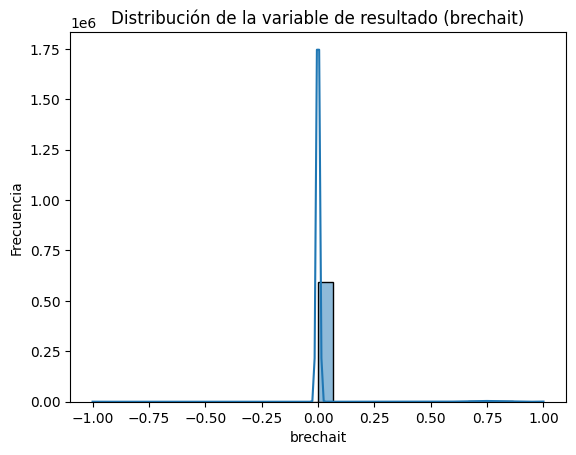

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Diagnóstico rápido
print(df['brechait'].describe())
print(df['brechait'].value_counts(dropna=False))

# Histograma
sns.histplot(df['brechait'], kde=True, bins=30)
plt.title('Distribución de la variable de resultado (brechait)')
plt.xlabel('brechait')
plt.ylabel('Frecuencia')
plt.show()


In [81]:
print(df.columns.tolist())

variables = [
    'treatment',
    'NRO CTA AHORRO ELECTRONICAS ACTIVAS',
    'NRO TOTAL CTA AHORROS',
    'SALDO TOTAL CTA AHORROS',
    'NRO TOTAL MICROCREDITO ',
    'MONTO TOTAL MICROCREDITO',
    'NRO CREDITO CONSUMO MUJERES',
    'NRO CREDITO CONSUMO HOMBRES',
    'NRO CORRESPONSALES ACTIVOS',
    'brechait'
]



['TIPO DE ENTIDAD', 'CODIGO DE LA  ENTIDAD', 'NOMBRE DE LA  ENTIDAD', 'FECHA DE CORTE', 'UNIDAD DE CAPTURA', 'DEPARTAMENTO', 'RENGLON', 'MUNICIPIO', 'TIPO', 'NRO CORRESPONSALES PROPIOS', 'NRO CORRESPONSALES TERCERIZADOS', 'NRO CORRESPONSALES ACTIVOS', 'NRO CORRESPONSALES', 'NRO DEPOSITOS', 'MONTO DEPOSITOS', 'NRO GIROS ENVIADOS ', 'MONTO GIROS ENVIADOS ', 'NRO GIROS RECIBIDOS', 'MONTO GIROS RECIBIDOS', 'NRO PAGOS', 'MONTO PAGOS', 'NRO RETIROS', 'MONTO RETIROS', 'NRO TRANSFERENCIAS', 'MONTO TRANSFERENCIAS', 'NRO TOTAL ', 'MONTO TOTAL', 'NRO CTA AHORRO HASTA 1 SMMLV', 'SALDO CTA AHORRO HASTA 1 SMMLV', 'NRO CTA AHORRO > 1 SMMLV HASTA 3 SMMLV', 'SALDO CTA AHORRO> 1 SMMLV HASTA 3 SMMLV', 'NRO CTA AHORRO> 3 SMMLV HASTA 5 SMMLV', 'SALDO CTA AHORRO> 3 SMMLV HASTA 5 SMMLV', 'NRO CTA AHORRO ACTIVAS', 'SALDO CTA AHORRO ACTIVAS', 'NRO CTA AHORRO MUJERES', 'SALDO CTA AHORRO MUJERES', 'NRO CTA AHORRO HOMBRES', 'SALDO CTA AHORRO HOMBRES', 'NRO TOTAL CTA AHORROS', 'SALDO TOTAL CTA AHORROS', 'NRO CTA A

In [82]:
# Filtrar las columnas relevantes y eliminar valores nulos
df_clean = df[variables].dropna()

# Separar X y y
X = df_clean.drop(columns=['treatment', 'brechait'])
y = df_clean['treatment']

# Estandarizar covariables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Estimar el propensity score con regresión logística
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_scaled, y)
df_clean['propensity_score'] = model.predict_proba(X_scaled)[:, 1]

# Aplicar emparejamiento (Nearest Neighbor Matching)
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Separar tratados y controles
tratados = df_clean[df_clean['treatment'] == 1]
controles = df_clean[df_clean['treatment'] == 0]

# Matching basado en propensity score
nn = NearestNeighbors(n_neighbors=1)
nn.fit(controles[['propensity_score']])
distancias, indices = nn.kneighbors(tratados[['propensity_score']])

# Extraer controles emparejados
controles_matched = controles.iloc[indices.flatten()]
matched_data = pd.concat([tratados.reset_index(drop=True), controles_matched.reset_index(drop=True)])

# Calcular el efecto promedio del tratamiento sobre los tratados (ATT)
att = matched_data.loc[matched_data['treatment'] == 1, 'brechait'].values - \
      matched_data.loc[matched_data['treatment'] == 0, 'brechait'].values
att_promedio = np.mean(att)

print(f"ATT estimado: {att_promedio:.4f}")


ATT estimado: 0.7887


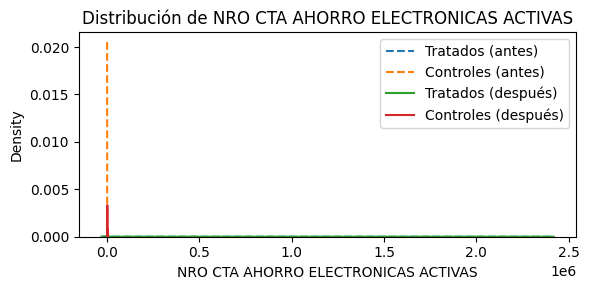

<ipython-input-84-3f2b52289856>:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(tratados[var], label='Tratados (antes)', linestyle='--')
<ipython-input-84-3f2b52289856>:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(matched_data.loc[matched_data['treatment']==1, var], label='Tratados (después)')
<ipython-input-84-3f2b52289856>:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(matched_data.loc[matched_data['treatment']==0, var], label='Controles (después)')


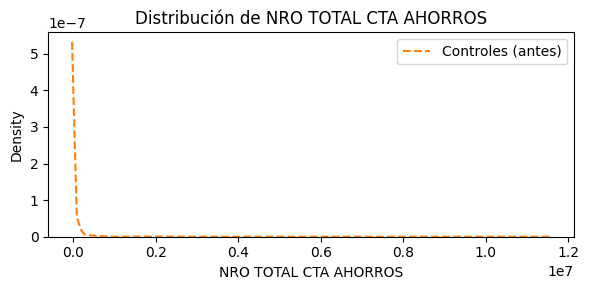

<ipython-input-84-3f2b52289856>:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(tratados[var], label='Tratados (antes)', linestyle='--')
<ipython-input-84-3f2b52289856>:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(matched_data.loc[matched_data['treatment']==1, var], label='Tratados (después)')
<ipython-input-84-3f2b52289856>:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(matched_data.loc[matched_data['treatment']==0, var], label='Controles (después)')


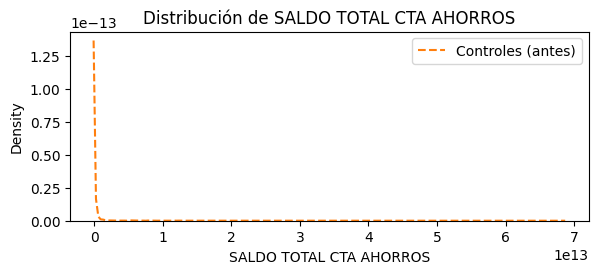

<ipython-input-84-3f2b52289856>:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(tratados[var], label='Tratados (antes)', linestyle='--')
<ipython-input-84-3f2b52289856>:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(matched_data.loc[matched_data['treatment']==1, var], label='Tratados (después)')
<ipython-input-84-3f2b52289856>:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(matched_data.loc[matched_data['treatment']==0, var], label='Controles (después)')


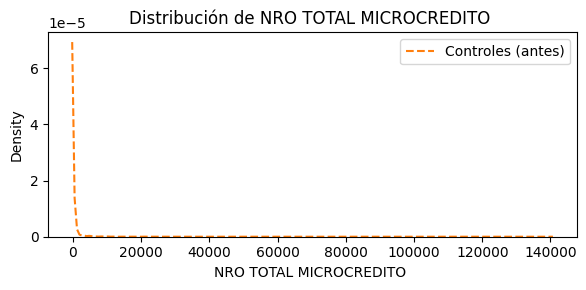

<ipython-input-84-3f2b52289856>:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(tratados[var], label='Tratados (antes)', linestyle='--')
<ipython-input-84-3f2b52289856>:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(matched_data.loc[matched_data['treatment']==1, var], label='Tratados (después)')
<ipython-input-84-3f2b52289856>:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(matched_data.loc[matched_data['treatment']==0, var], label='Controles (después)')


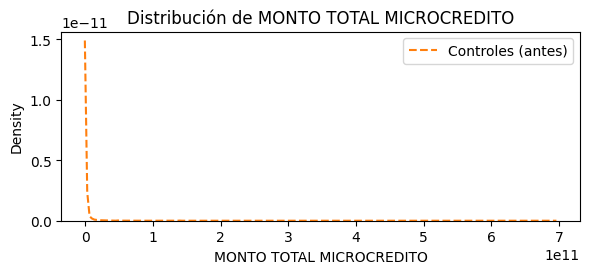

<ipython-input-84-3f2b52289856>:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(tratados[var], label='Tratados (antes)', linestyle='--')
<ipython-input-84-3f2b52289856>:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(matched_data.loc[matched_data['treatment']==1, var], label='Tratados (después)')
<ipython-input-84-3f2b52289856>:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(matched_data.loc[matched_data['treatment']==0, var], label='Controles (después)')


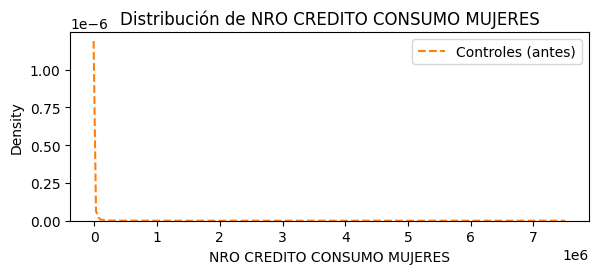

<ipython-input-84-3f2b52289856>:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(tratados[var], label='Tratados (antes)', linestyle='--')
<ipython-input-84-3f2b52289856>:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(matched_data.loc[matched_data['treatment']==1, var], label='Tratados (después)')
<ipython-input-84-3f2b52289856>:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(matched_data.loc[matched_data['treatment']==0, var], label='Controles (después)')


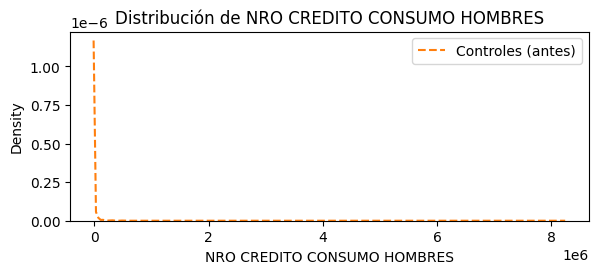

<ipython-input-84-3f2b52289856>:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(tratados[var], label='Tratados (antes)', linestyle='--')
<ipython-input-84-3f2b52289856>:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(matched_data.loc[matched_data['treatment']==1, var], label='Tratados (después)')
<ipython-input-84-3f2b52289856>:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(matched_data.loc[matched_data['treatment']==0, var], label='Controles (después)')


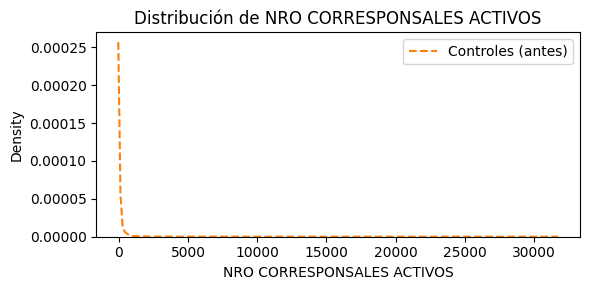

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Comparar la media de covariables antes y después del matching
for var in X.columns:
    plt.figure(figsize=(6,3))
    sns.kdeplot(tratados[var], label='Tratados (antes)', linestyle='--')
    sns.kdeplot(controles[var], label='Controles (antes)', linestyle='--')
    sns.kdeplot(matched_data.loc[matched_data['treatment']==1, var], label='Tratados (después)')
    sns.kdeplot(matched_data.loc[matched_data['treatment']==0, var], label='Controles (después)')
    plt.title(f'Distribución de {var}')
    plt.legend()
    plt.tight_layout()
    plt.show()


Balance de covariables después de matching

In [86]:
import numpy as np

# Construir pares emparejados
pares = list(zip(
    tratados['brechait'].values,
    controles_matched['brechait'].values
))

# Bootstrap por pares
n_boot = 1000
atts = []

for _ in range(n_boot):
    sample = np.random.choice(len(pares), size=len(pares), replace=True)
    att_sample = [pares[i][0] - pares[i][1] for i in sample]
    atts.append(np.mean(att_sample))

# Calcular intervalo de confianza
ci_lower = np.percentile(atts, 2.5)
ci_upper = np.percentile(atts, 97.5)

print(f"Intervalo de confianza del ATT (95%): [{ci_lower:.4f}, {ci_upper:.4f}]")



Intervalo de confianza del ATT (95%): [0.7847, 0.7925]
